In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../csv/volcanoes_2021.csv', delimiter=';', encoding = "ISO-8859-1")
df.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,"50,17","6,85",600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,"45,775","2,97",1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,"42,17","2,53",893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,"38,87","-4,02",1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211003,Vulsini,Italy,Caldera,Eruption Observed,104 BCE,Mediterranean and Western Asia,Italy,"42,6","11,93",800,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)


In [3]:
df.shape[0]

1356

In [4]:
df['Latitude']

0         50,17
1        45,775
2         42,17
3         38,87
4          42,6
         ...   
1351    -56,656
1352      -56,3
1353    -55,912
1354     -64,15
1355     -62,02
Name: Latitude, Length: 1356, dtype: object

In [5]:
# Latitude and Longitude are of type object and have a ',' instead of '.'

df['Latitude'] = df['Latitude'].str.replace(',','.')
df['Latitude'] = pd.to_numeric(df['Latitude'],errors = 'coerce')

In [6]:
df['Longitude'] = df['Longitude'].str.replace(',','.')
df['Longitude'] = pd.to_numeric(df['Longitude'],errors = 'coerce')

In [7]:
df.isnull().sum()

Volcano Number           0
Volcano Name             0
Country                  0
Primary Volcano Type     0
Activity Evidence        0
Last Known Eruption      0
Region                   0
Subregion                0
Latitude                 0
Longitude                0
Elevation (m)            0
Dominant Rock Type      21
Tectonic Setting         5
dtype: int64

In [8]:
# Check how many values are "Unknown" in each column

for col in df.columns:
    unknowns = df[df[col]=='Unknown'].size
    print(f"{col} = {unknowns}" )

Volcano Number = 0
Volcano Name = 0
Country = 0
Primary Volcano Type = 0
Activity Evidence = 0
Last Known Eruption = 6370
Region = 0
Subregion = 0
Latitude = 0
Longitude = 0
Elevation (m) = 0
Dominant Rock Type = 0
Tectonic Setting = 13


In [9]:
# Remove CE/BCE notation from 'Last Known Eruption' and replace it with positive/negative number

def convert_year(x):
    if 'BCE' in x.strip():
       return "-"+re.sub(r' BCE', '', x)
    elif 'CE' in x.strip():
       return re.sub(r' CE', '', x)
    else: return x.strip()

df['Last Known Eruption'] = df['Last Known Eruption'].apply(convert_year)
df['Last Known Eruption'] = pd.to_numeric( df['Last Known Eruption'], errors='coerce').astype('Int64')

In [10]:
# Let's explore the distribution of 'Last Known Eruption' over time 

min_last_eruption_year= df['Last Known Eruption'].min()
max_last_eruption_year= df['Last Known Eruption'].max()
print(f'min={min_last_eruption_year}, max={max_last_eruption_year}')

min=-10450, max=2021


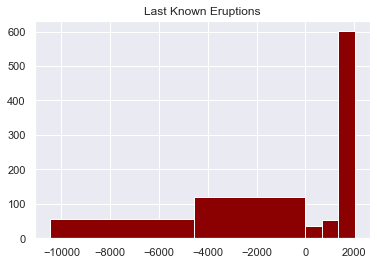

In [11]:
eruption_years = df['Last Known Eruption'][df['Last Known Eruption']!='Unknown']
plt.hist(eruption_years, bins =[-10450,-4571, 0, 672, 1344, 2021 ], color='darkred')
plt.title( "Last Known Eruptions")
plt.xticks( rotation='horizontal')
plt.show()

In [12]:
# The last known eruptions are clearly concentrated on the last 1000 years.
# This can probably be attributed to the fact that it's harder to find information about eruptions
# that happened so long in the past.

In [13]:
# Volcano types exploration

df['Primary Volcano Type'].value_counts()

Stratovolcano          554
Stratovolcano(es)      116
Submarine              115
Shield                 102
Pyroclastic cone(s)     87
Volcanic field          80
Caldera                 76
Complex                 52
Lava dome(s)            29
Shield(s)               23
Pyroclastic cone        16
Fissure vent(s)         15
Compound                12
Maar(s)                 10
Caldera(s)              10
Tuff cone(s)             9
Pyroclastic shield       8
Lava dome                8
Crater rows              6
Subglacial               5
Maar                     5
Fissure vent             3
Tuff cone                3
Stratovolcano?           2
Lava cone                2
Submarine(es)            2
Explosion crater(s)      1
Complex(es)              1
Cone(s)                  1
Tuff ring(s)             1
Lava cone(s)             1
Lava cone(es)            1
Name: Primary Volcano Type, dtype: int64

In [14]:
# We have 'Stratovolcano' and 'Stratovolcano(es)', both with significant numbers.
# Let's change 'Stratovolcano(es)' to 'Stratovolcano' 

df['Primary Volcano Type'].replace(['Stratovolcano(es)'], 'Stratovolcano', inplace=True)
df['Primary Volcano Type'].value_counts()

Stratovolcano          670
Submarine              115
Shield                 102
Pyroclastic cone(s)     87
Volcanic field          80
Caldera                 76
Complex                 52
Lava dome(s)            29
Shield(s)               23
Pyroclastic cone        16
Fissure vent(s)         15
Compound                12
Maar(s)                 10
Caldera(s)              10
Tuff cone(s)             9
Pyroclastic shield       8
Lava dome                8
Crater rows              6
Subglacial               5
Maar                     5
Fissure vent             3
Tuff cone                3
Stratovolcano?           2
Lava cone                2
Submarine(es)            2
Explosion crater(s)      1
Complex(es)              1
Cone(s)                  1
Tuff ring(s)             1
Lava cone(s)             1
Lava cone(es)            1
Name: Primary Volcano Type, dtype: int64

In [15]:
# Dominant Rock type exploration

df['Dominant Rock Type'].value_counts()

Andesite / Basaltic Andesite                559
Basalt / Picro-Basalt                       427
Dacite                                       89
Trachybasalt / Tephrite Basanite             65
Rhyolite                                     61
No Data (checked)                            45
Trachyte / Trachydacite                      36
Trachyandesite / Basaltic Trachyandesite     28
Foidite                                      14
Phonolite                                     8
Phono-tephrite /  Tephri-phonolite            3
Name: Dominant Rock Type, dtype: int64

In [16]:
# We have "No Data" values. Let's change them to NaN for consistency
# Let's count the current number of NaN to check later that it worked

df['Dominant Rock Type'].isnull().sum()

21

In [17]:
df['Dominant Rock Type'].replace(['No Data (checked)'], np.NaN, inplace=True)
df['Dominant Rock Type'].value_counts()

Andesite / Basaltic Andesite                559
Basalt / Picro-Basalt                       427
Dacite                                       89
Trachybasalt / Tephrite Basanite             65
Rhyolite                                     61
Trachyte / Trachydacite                      36
Trachyandesite / Basaltic Trachyandesite     28
Foidite                                      14
Phonolite                                     8
Phono-tephrite /  Tephri-phonolite            3
Name: Dominant Rock Type, dtype: int64

In [18]:
# Let's check the new count of NaN. It should now include the count of "No Data"

df['Dominant Rock Type'].isnull().sum()

66

In [19]:
df.to_csv('volcanoes_cleaned.csv', index=False)

In [20]:
df[df['Volcano Number']==210030]

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,<NA>,Mediterranean and Western Asia,Western Europe,42.17,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)


In [21]:
for col in df.columns:
    unknowns = df[df[col]=='Unknown'].size
    print(f"{col} = {unknowns}" )

Volcano Number = 0
Volcano Name = 0
Country = 0
Primary Volcano Type = 0
Activity Evidence = 0
Last Known Eruption = 0
Region = 0
Subregion = 0
Latitude = 0
Longitude = 0
Elevation (m) = 0
Dominant Rock Type = 0
Tectonic Setting = 13
